In [77]:
import rasterio as rio

dem_path='C:/Users/USER/Desktop/강서구load/35816(김해)/35816020.img'
dem_data=rio.open(dem_path)


# print(dem_data.count)
# print(dem_data.read(1))
print(dem_data.crs)
print(dem_data.count)
print(dem_data.height)
print(dem_data.width)
print(dem_data)
dem_data.crs.from_epsg(4356)
print(dem_data.crs)
print(dem_data.count)
print(dem_data.height)
print(dem_data.width)
print(dem_data)



PROJCS["Transverse Mercator",GEOGCS["Geocentric_datum_of_Korea",DATUM["Geocentric_datum_of_Korea",SPHEROID["GRS 1980",6378137,298.257222101004],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6737"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127],PARAMETER["scale_factor",1],PARAMETER["false_easting",200000],PARAMETER["false_northing",600000],UNIT["meters",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
1
2920
2430
<open DatasetReader name='C:/Users/USER/Desktop/강서구load/35816(김해)/35816020.img' mode='r'>
PROJCS["Transverse Mercator",GEOGCS["Geocentric_datum_of_Korea",DATUM["Geocentric_datum_of_Korea",SPHEROID["GRS 1980",6378137,298.257222101004],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6737"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["centra

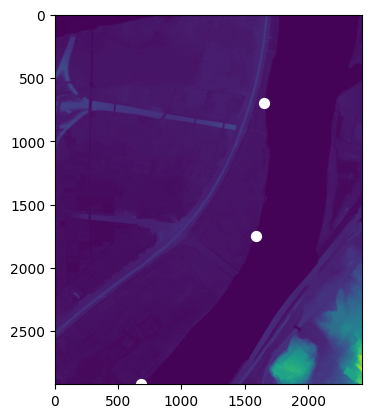

In [93]:
from matplotlib import pyplot as plt
from matplotlib.bezier import BezierSegment
import numpy as np

# 이미지 표시
plt.imshow(dem_data.read(1))

#세점 좌표에 대한 곡선 정의
points = np.array([[1650,750],[1590,1750],[680,2919]])

#bezier커브를 이용한 점 표시

bezier = BezierSegment(points)
print(bezier)
#곡선 그리기
# num_points_on_curve = 100
# curve_poits = []

# for t in np.linspace(0,1, num_points_on_curve):
#     curve_points=np.append(bezier(t))

# plt.plot(curve_points[:, 0], curve_points[:, 1], '-b')

# # 좌표 (750, 0)에 흰색 점 찍기
plt.scatter(1650, 700, c='white', marker='o', s=50)  # c는 색상, marker는 마커 모양, s는 크기입니다.
plt.scatter(1590, 1750, c='white', marker='o', s=50)
plt.scatter(680, 2919, c='white', marker='o', s=50)
# # 그래프 표시


plt.show()

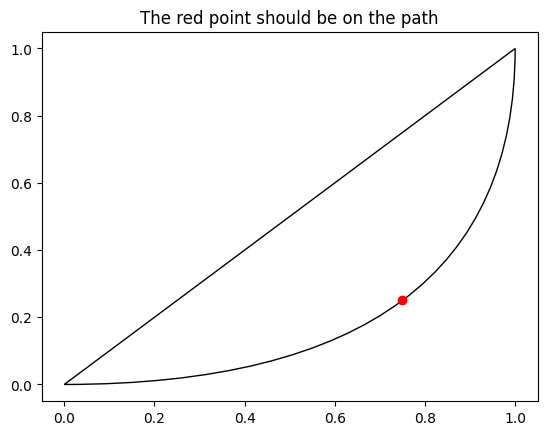

In [109]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

Path = mpath.Path

fig, ax = plt.subplots()
pp1 = mpatches.PathPatch(
    Path([(0, 0), (1, 0), (1, 1), (0, 0)],
         [Path.MOVETO, Path.CURVE3, Path.CURVE3, Path.CLOSEPOLY]),
    fc="none", transform=ax.transData)

ax.add_patch(pp1)
ax.plot([0.75], [0.25], "ro")
ax.set_title('The red point should be on the path')

plt.show()

AttributeError: 'Figure' object has no attribute 'plot'

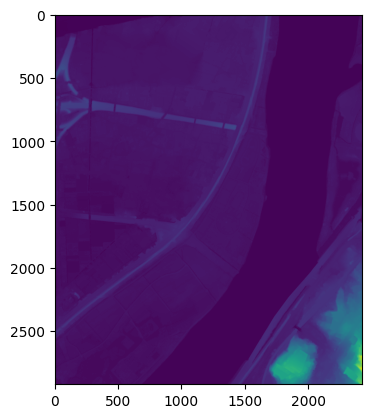

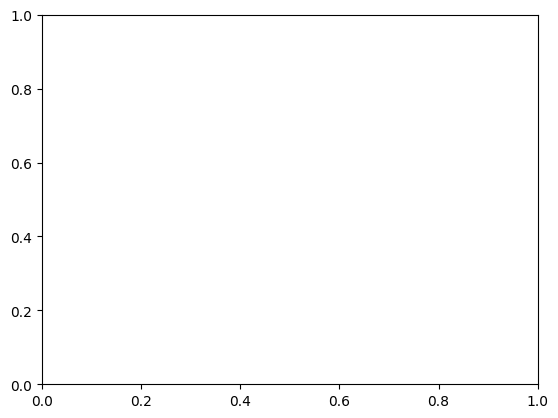

In [113]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(dem_data.read(1))
Path = mpath.Path

fig, ax = plt.subplots()
# 베지에 곡선을 정의하기 위한 점과 제어점을 설정합니다.
points = np.array([(0, 0), (1, 0), (1, 1), (0, 0)])
controls = np.array([(0.25, 0.25), (0.75, 0.25)])

# 베지에 곡선의 점과 제어점을 이용하여 경로를 생성합니다.
#path_data = [Path.MOVETO, Path.CURVE3, Path.CURVE3, Path.CLOSEPOLY]
#path = Path(points, path_data)
pp1 = mpatches.PathPatch(
    Path([(0, 0), (1, 0), (1, 1), (0, 0)],
         [Path.MOVETO, Path.CURVE3, Path.CURVE3, Path.CLOSEPOLY]),
    fc="none", transform=ax.transData)
paths=pp1.get_path()
x,y=zip(*paths.vertices)
# 경로를 그림 위에 추가합니다.
#plt.scatter(pp1, c='white', marker='ro', s=50)
fig.plot([0.75], [0.25], "ro")
#ax.set_title('The red point should be on the path')
# 빨간색 점을 그림 위에 추가합니다.
ax.plot([0.75], [0.25], "ro")

# 그래프 제목 설정
ax.set_title('The red point should be on the path')

plt.show()

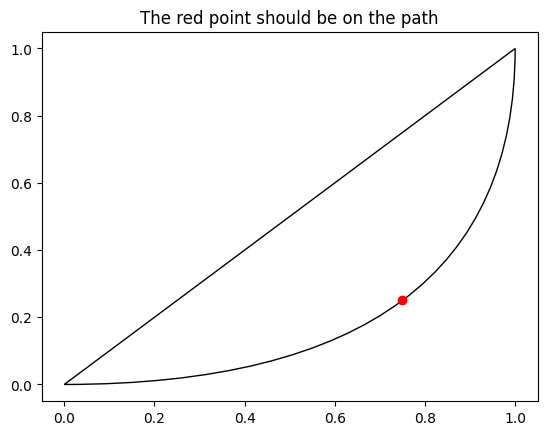

In [111]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

Path = mpath.Path

fig, ax = plt.subplots()
pp1 = mpatches.PathPatch(
    Path([(0, 0), (1, 0), (1, 1), (0, 0)],
         [Path.MOVETO, Path.CURVE3, Path.CURVE3, Path.CLOSEPOLY]),
    fc="none", transform=ax.transData)

ax.add_patch(pp1)
ax.plot([0.75], [0.25], "ro")
ax.set_title('The red point should be on the path')

plt.show()

In [1]:
import multiprocessing

# 사용 가능한 물리적인 CPU 코어의 수 확인
num_cores = multiprocessing.cpu_count()
print(f"Number of available CPU cores: {num_cores}")

Number of available CPU cores: 24


In [1]:
import pycuda.driver as cuda
import pycuda.autoinit
from pycuda.compiler import SourceModule


In [4]:
import numpy as np
h_array=np.random.randn(4,4)
h_array=h_array.astype(np.float32)

In [6]:
d_array=cuda.mem_alloc(h_array.nbytes)
cuda.memcpy_htod(d_array,h_array)

In [8]:
kernel1=SourceModule(
    """"
    __global__ void multiply(float *x)
    {
        int ID= threadIdx.x+blockIdx.y*4
        x[ID]=X[ID]*4;
    }
    """
)

CompileError: nvcc compilation of C:\Users\OFFICE\AppData\Local\Temp\tmp2x9vnik8\kernel.cu failed
[command: nvcc --cubin -arch sm_89 -m64 -Ic:\Users\OFFICE\AppData\Local\Programs\Python\Python310\lib\site-packages\pycuda\cuda kernel.cu]
[stdout:
nvcc fatal   : Cannot find compiler 'cl.exe' in PATH
]